Notebook to quickly examine one simulation

In [1]:
import netCDF4 as nc
from salishsea_tools import nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [4]:
results = '/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/vertical_res'

run = 'dbl_tanh'

path = os.path.join(results,run)

print path

filepart = 'SalishSea_1d_20030819_20030927'

/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/vertical_res/dbl_tanh


In [7]:
y=5
f = nc.Dataset(os.path.join(path,'{}_grid_U.nc'.format(filepart)))
Us = f.variables['vozocrtx'][:,:,y,:]
f = nc.Dataset(os.path.join(path,'{}_grid_W.nc'.format(filepart)))
Ws = f.variables['vovecrtz'][:,:,y,:]
#Viscs = f.variables['ve_eddy_visc'][:,:,y,:]
#Diffs = f.variables['ve_eddy_diff'][:,:,y,:]
f = nc.Dataset(os.path.join(path,'{}_grid_T.nc'.format(filepart)))
Ts = f.variables['votemper'][:,:,y,:]
Ss = f.variables['vosaline'][:,:,y,:]
    
depths = f.variables['deptht'][:]
x = f.variables['nav_lon'][y,:]

xx,zz = np.meshgrid(x,-depths[:])

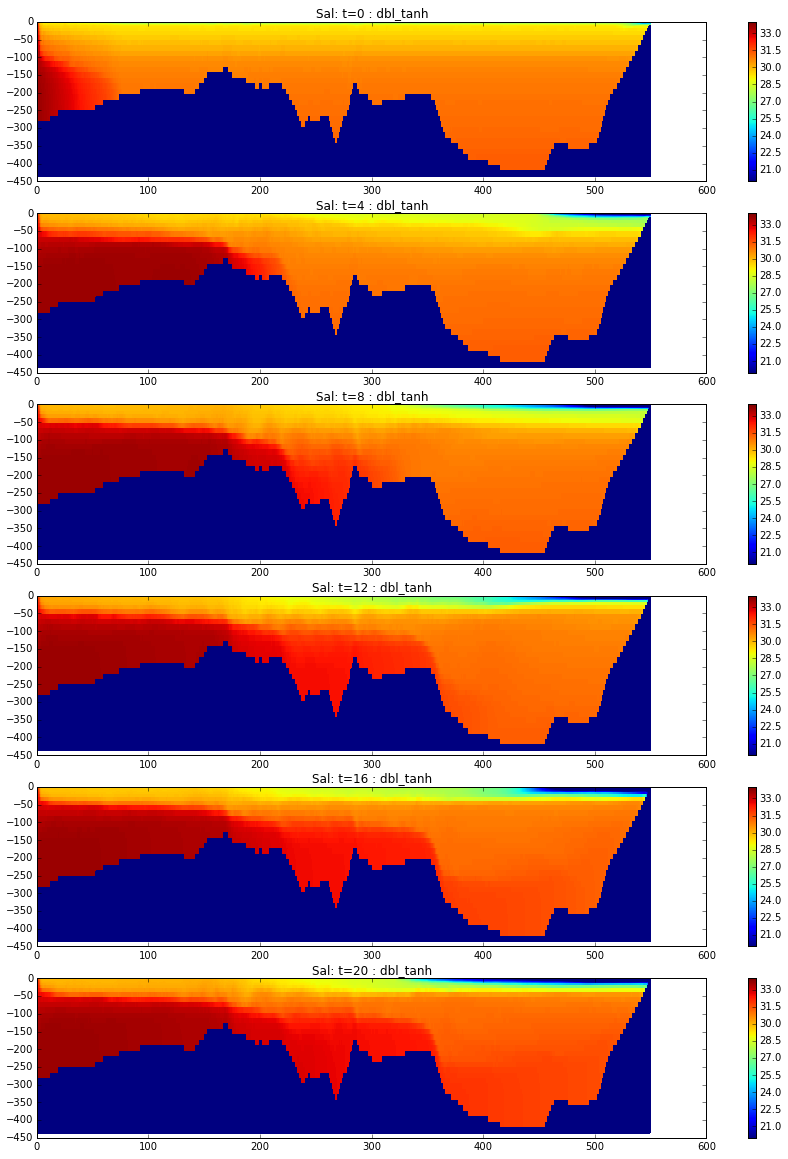

In [8]:
fig, axs = plt.subplots(6,1,figsize=(15,20))
ts = np.arange(0,24,4)
               
for t,ax in zip(ts,axs.flat):
    mesh=ax.pcolormesh(xx,zz,Ss[t,:,:],vmin=20,vmax=34)
    ax.set_title('Sal: t={} : {}'.format(t, run))
    fig.colorbar(mesh,ax=ax)

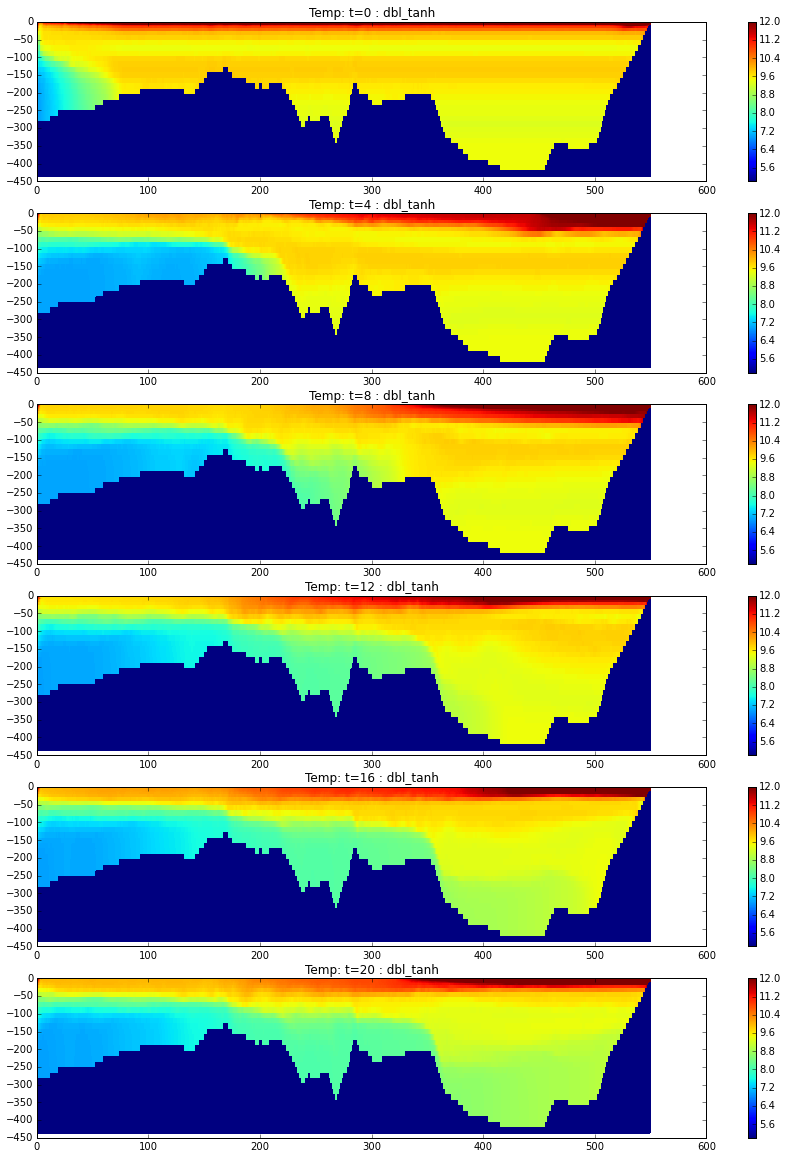

In [9]:
fig, axs = plt.subplots(6,1,figsize=(15,20))
ts = np.arange(0,24,4)
               
for t,ax in zip(ts,axs.flat):
    mesh=ax.pcolormesh(xx,zz,Ts[t,:,:],vmin=5,vmax=12)
    ax.set_title('Temp: t={} : {}'.format(t, run))
    fig.colorbar(mesh,ax=ax)

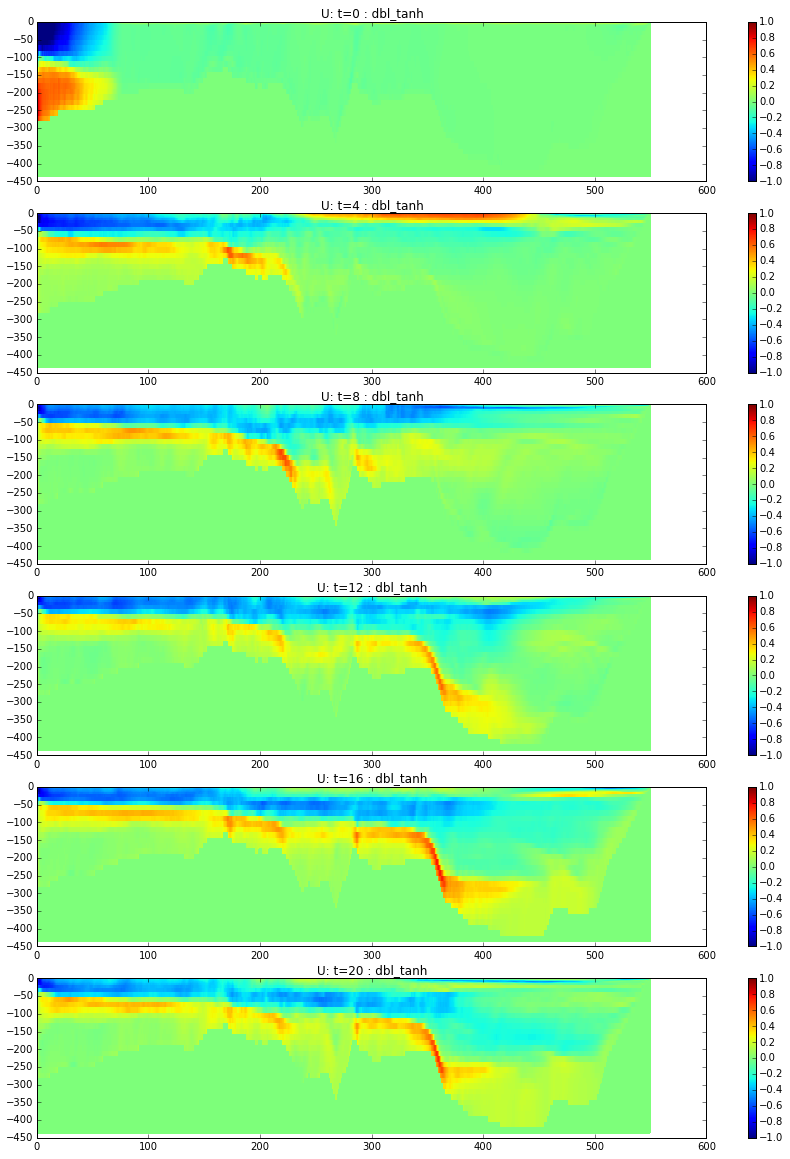

In [10]:
fig, axs = plt.subplots(6,1,figsize=(15,20))
ts = np.arange(0,24,4)
               
for t,ax in zip(ts,axs.flat):
    mesh=ax.pcolormesh(xx,zz,Us[t,:,:],vmin=-1,vmax=1)
    ax.set_title('U: t={} : {}'.format(t, run))
    fig.colorbar(mesh,ax=ax)